# Diabetes Health Indicator Machine Learing Analysis

This project was completed for the data mining and machine learning 1 module. The data for this project was sourced from Kaggle. Logistic regression and Random Forest machine learning methods were applied to this healthcare survey data to predict if a patient had diabetes or not. 

In [169]:
#intall and load libraries 
#install.packages('car')
library(car)
#install.packages('caret')
library(caret)
#install.packages('olsrr')
library(olsrr)
#install.packages('ggplot2')
library(ggplot2)
#install.packages('ggthemes')
library(ggthemes)
#install.packages('scales')
library(scales)
#install.packages('Amelia')
library(Amelia)
#install.packages('dplyr')
library(dplyr)
#install.packages('leaps')
library(leaps)
#install.packages('haven')
library(haven)
#install.packages('gridExtra')
library(gridExtra)
#install.packages('regclass')
library(regclass)
#install.packages('purrr')
library(purrr)
library(tidyverse)
library(mlbench)
library(OddsPlotty)
#library(InformationValue)

# Load diabetes data 

In [319]:
#import diabetes data 
data <- read.csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [320]:
nrow(data)
ncol(data)

[1] 70692

[1] 22

In [321]:
str(data)

'data.frame':	70692 obs. of  22 variables:
 $ Diabetes_binary     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HighBP              : num  1 1 0 1 0 0 0 0 0 0 ...
 $ HighChol            : num  0 1 0 1 0 0 1 0 0 0 ...
 $ CholCheck           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ BMI                 : num  26 26 26 28 29 18 26 31 32 27 ...
 $ Smoker              : num  0 1 0 1 1 0 1 1 0 1 ...
 $ Stroke              : num  0 1 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: num  0 0 0 0 0 0 0 0 0 0 ...
 $ PhysActivity        : num  1 0 1 1 1 1 1 0 1 0 ...
 $ Fruits              : num  0 1 1 1 1 1 1 1 1 1 ...
 $ Veggies             : num  1 0 1 1 1 1 1 1 1 1 ...
 $ HvyAlcoholConsump   : num  0 0 0 0 0 0 1 0 0 0 ...
 $ AnyHealthcare       : num  1 1 1 1 1 0 1 1 1 1 ...
 $ NoDocbcCost         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ GenHlth             : num  3 3 1 3 2 2 1 4 3 3 ...
 $ MentHlth            : num  5 0 0 0 0 7 0 0 0 0 ...
 $ PhysHlth            : num  30 0 10 3 0 0 0 0 0 6 ...
 $ DiffWalk            : nu

In [228]:
summary(data)

 Diabetes_binary     HighBP          HighChol        CholCheck     
 Min.   :0.0     Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.5     Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   :0.5     Mean   :0.5635   Mean   :0.5257   Mean   :0.9753  
 3rd Qu.:1.0     3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0     Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      BMI            Smoker           Stroke        HeartDiseaseorAttack
 Min.   :12.00   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000      
 1st Qu.:25.00   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000      
 Median :29.00   Median :0.0000   Median :0.00000   Median :0.0000      
 Mean   :29.86   Mean   :0.4753   Mean   :0.06217   Mean   :0.1478      
 3rd Qu.:33.00   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000      
 Max.   :98.00   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000      
  PhysActivit

In [310]:
#check for any missing data
sum(is.na(data))

[1] 0

In [322]:
names(data)[1] <- "Diabetes"

In [323]:
#Convert 0 to M and 1 to F for Gender 
data[data$Diabetes ==0,]$Diabetes <- 'Non Diabetic'
data[data$Diabetes ==1,]$Diabetes <- 'Diabetic'

In [324]:
#Convert relevant variables to factors 
data$Diabetes <- as.factor(data$Diabetes)
data$HighBP <- as.factor(data$HighBP)
data$HighChol <- as.factor(data$HighChol) 
data$CholCheck <- as.factor(data$CholCheck)
data$Smoker <- as.factor(data$Smoker)
data$Stroke <- as.factor(data$Stroke)
data$HeartDiseaseorAttack <- as.factor(data$HeartDiseaseorAttack)
data$PhysActivity <- as.factor(data$PhysActivity)
data$Fruits <- as.factor(data$Fruits)
data$Veggies <- as.factor(data$Veggies)
data$HvyAlcoholConsump <- as.factor(data$HvyAlcoholConsump)
data$AnyHealthcare <- as.factor(data$AnyHealthcare)
data$NoDocbcCost <- as.factor(data$NoDocbcCost)
data$DiffWalk <- as.factor(data$DiffWalk)
data$Sex <- as.factor(data$Sex)

In [51]:
#Histogram Plot function
plotVar <- function(var, breaks=20, label='')
{
    hist(var, freq=FALSE, breaks=breaks, col='lightskyblue', 
         main=paste('Histogram of', label), xlab=label)
    curve(dnorm(x, mean=mean(var), sd=sd(var)), 
          from=min(var), to=max(var),
          col='red', lw=4, add=TRUE)
}

# Data Exploration

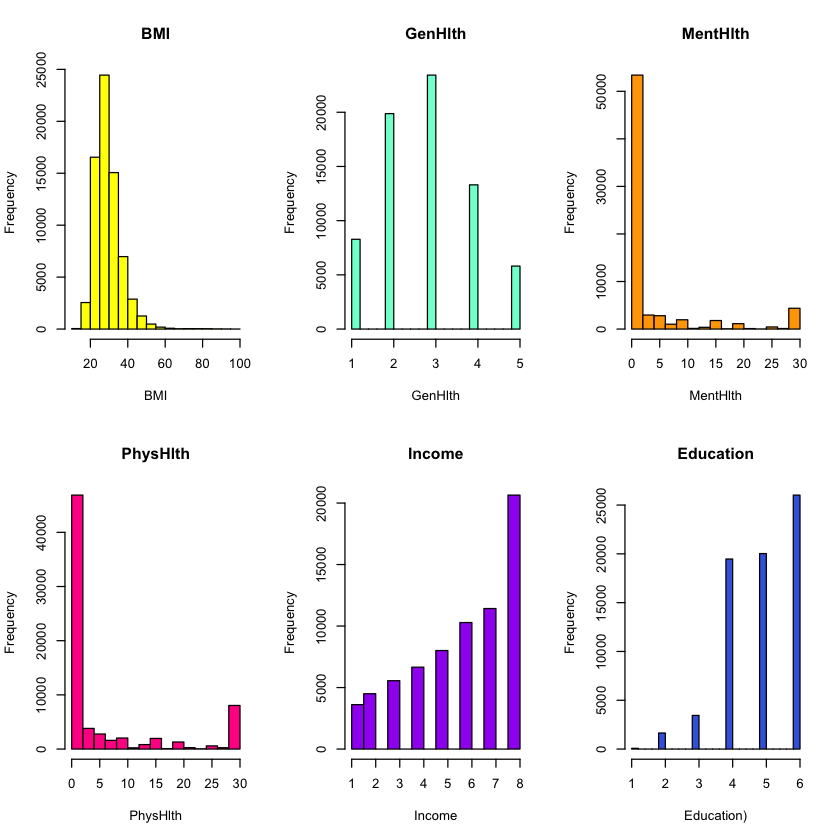

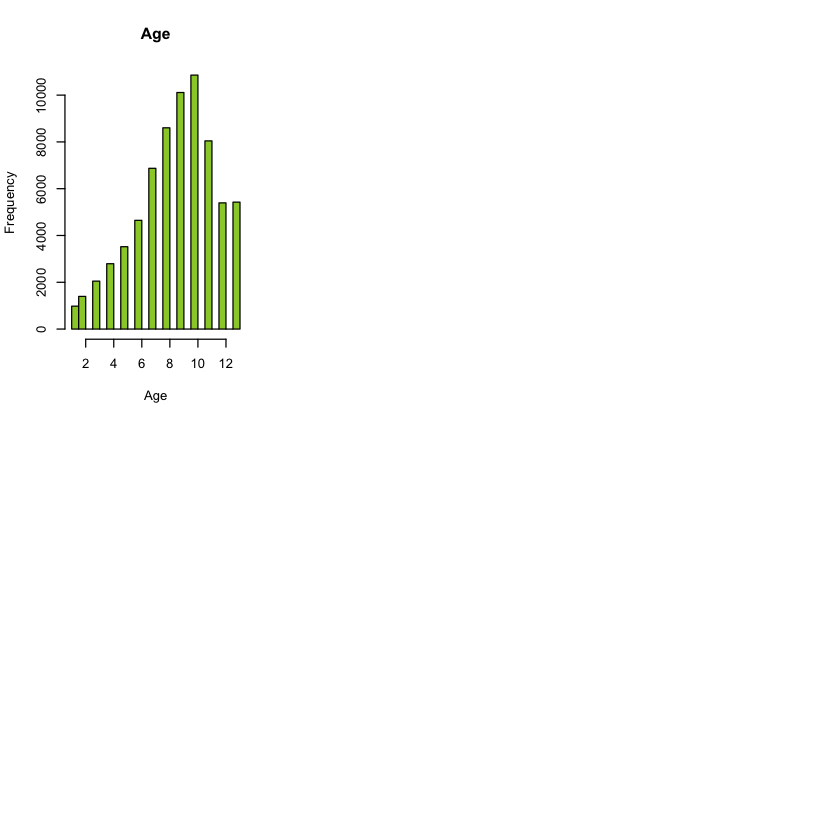

In [181]:
par(mfrow=c(2,3))
hist(data$BMI, xlab = "BMI", main = "BMI",col = 'yellow')
hist(data$GenHlth, xlab = "GenHlth", main = "GenHlth", col = 'aquamarine')
hist(data$MentHlth, xlab = "MentHlth", main = "MentHlth", col = 'orange')
hist(data$PhysHlth, xlab = "PhysHlth", main = "PhysHlth", col = 'deeppink')
hist(data$Income, xlab = "Income", main = "Income", col = 'purple')
hist(data$Education, xlab = "Education)", main = "Education", col = 'royalblue')
hist(data$Age, xlab = "Age", main = "Age", col = 'olivedrab3')


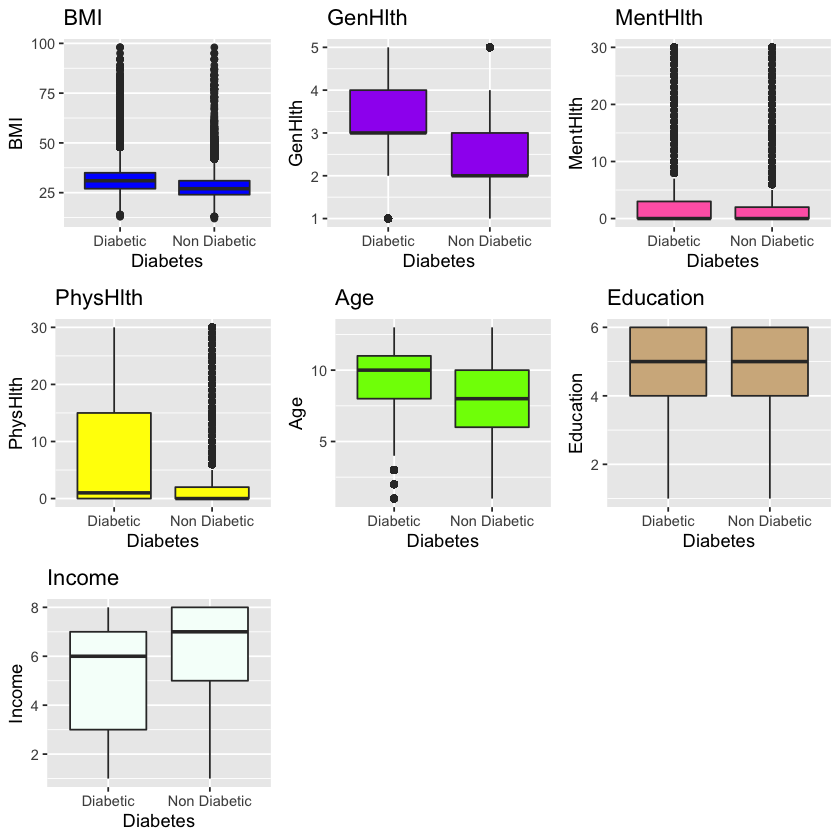

In [185]:
grid.arrange(
ggplot(data, aes(Diabetes, BMI)) + 
  geom_boxplot(fill='blue') +
  ggtitle("BMI") + 
  ylab("BMI"),

ggplot(data, aes(Diabetes, GenHlth)) + 
  geom_boxplot(fill='purple') +
  ggtitle("GenHlth") + 
  ylab("GenHlth"),
    
ggplot(data, aes(Diabetes, MentHlth)) + 
  geom_boxplot(fill='hotpink') +
  ggtitle("MentHlth") + 
  ylab("MentHlth"),
    
ggplot(data, aes(Diabetes, PhysHlth)) + 
  geom_boxplot(fill='yellow') +
  ggtitle("PhysHlth") + 
  ylab("PhysHlth"),
  
ggplot(data, aes(Diabetes, Age)) + 
  geom_boxplot(fill='lawngreen') +
  ggtitle("Age") + 
  ylab("Age"),

ggplot(data, aes(Diabetes, Education)) + 
  geom_boxplot(fill='tan') +
  ggtitle("Education") + 
  ylab("Education"),

ggplot(data, aes(Diabetes, Income)) + 
  geom_boxplot(fill='mintcream') +
  ggtitle("Income") + 
  ylab("Income"),
ncol = 3)

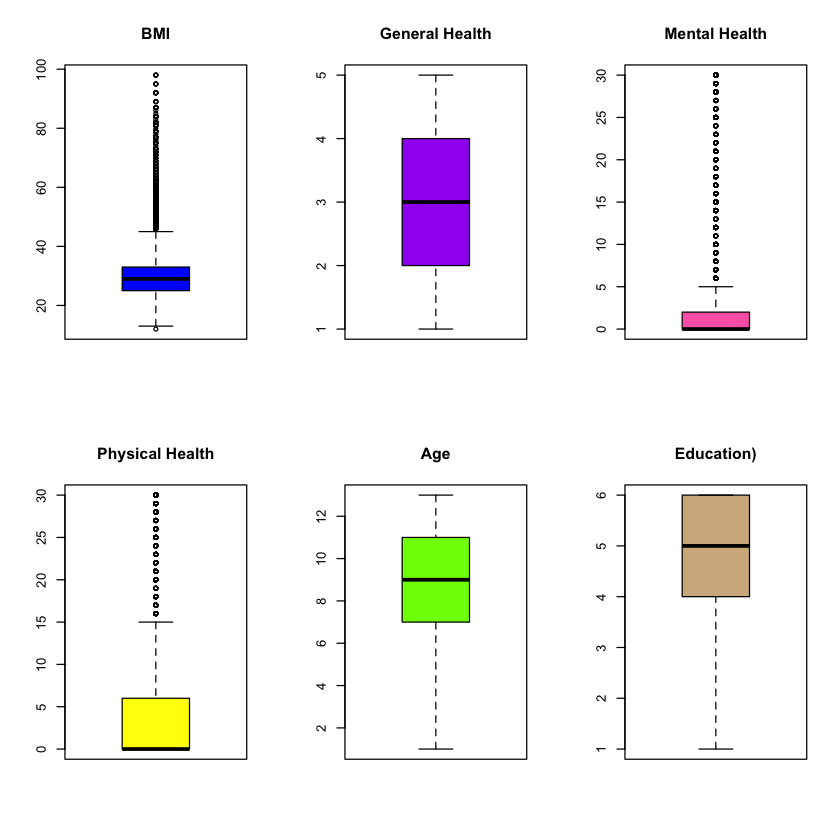

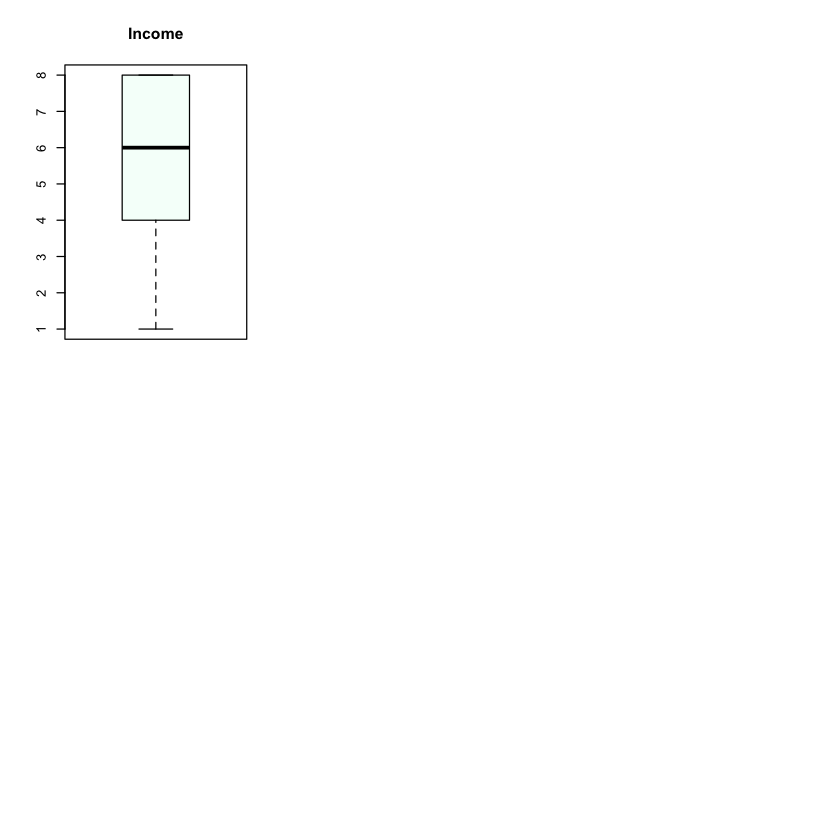

In [84]:
#Boxplot - of non catagorical variables 
# check variables for normality 
par(mfrow = c(2, 3)) # Create a 4 x 3 plotting matrix
boxplot(data$BMI, main = "BMI", col = 'blue')
boxplot(data$GenHlth, main = "General Health", col = 'purple')
boxplot(data$MentHlth, main = "Mental Health", col = 'hotpink')
boxplot(data$PhysHlth, main = "Physical Health", col = 'yellow')
boxplot(data$Age, main = "Age", col = 'lawngreen')
boxplot(data$Education, main = "Education)", col = 'tan')
boxplot(data$Income, main = "Income",  col = 'mintcream')

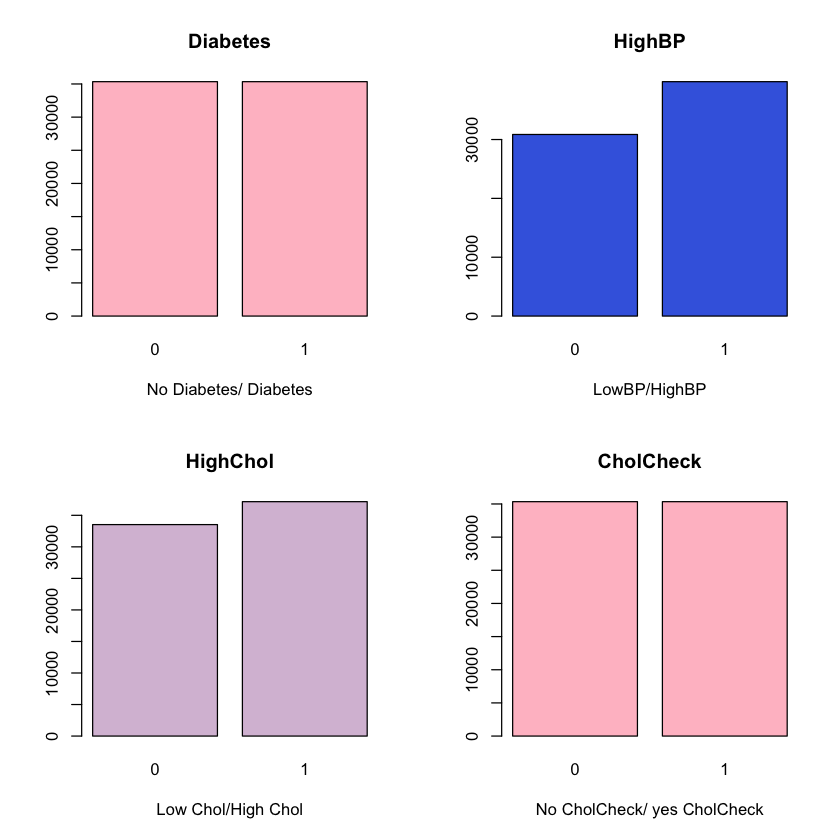

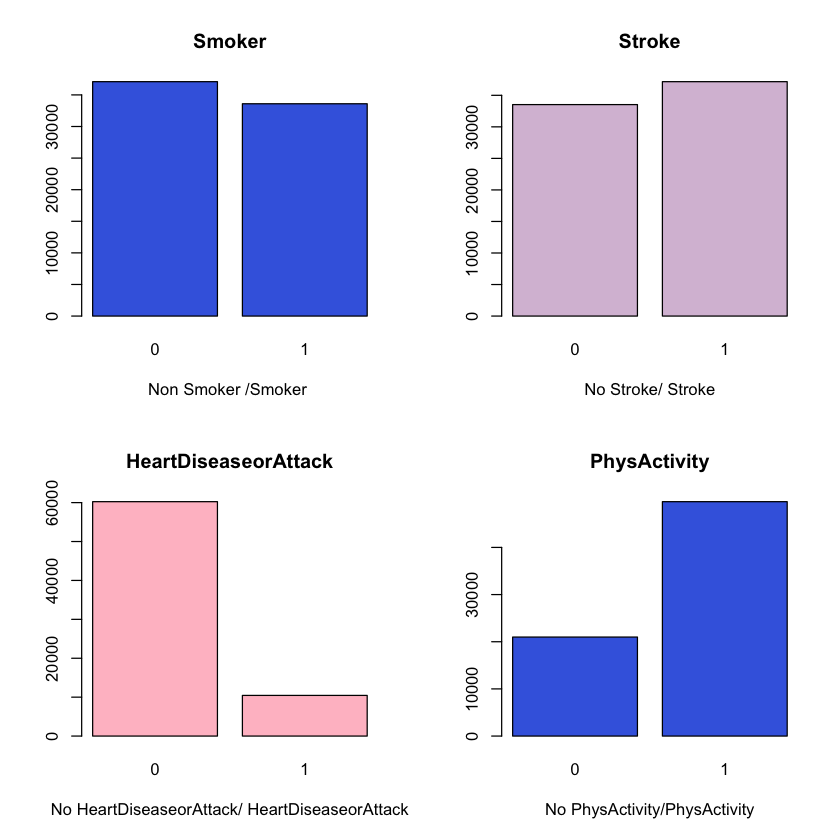

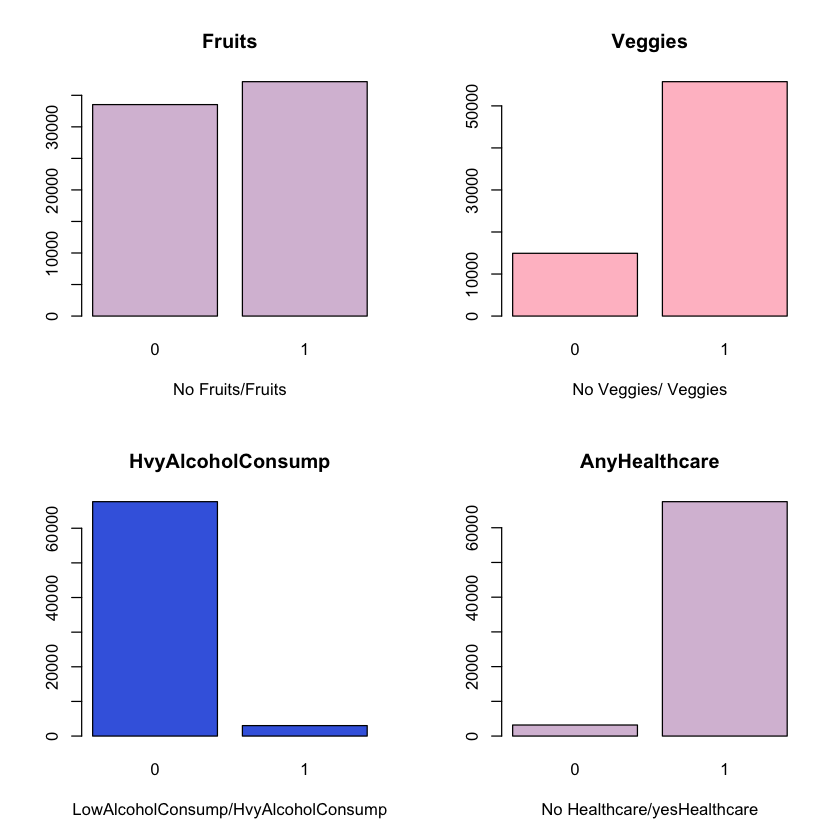

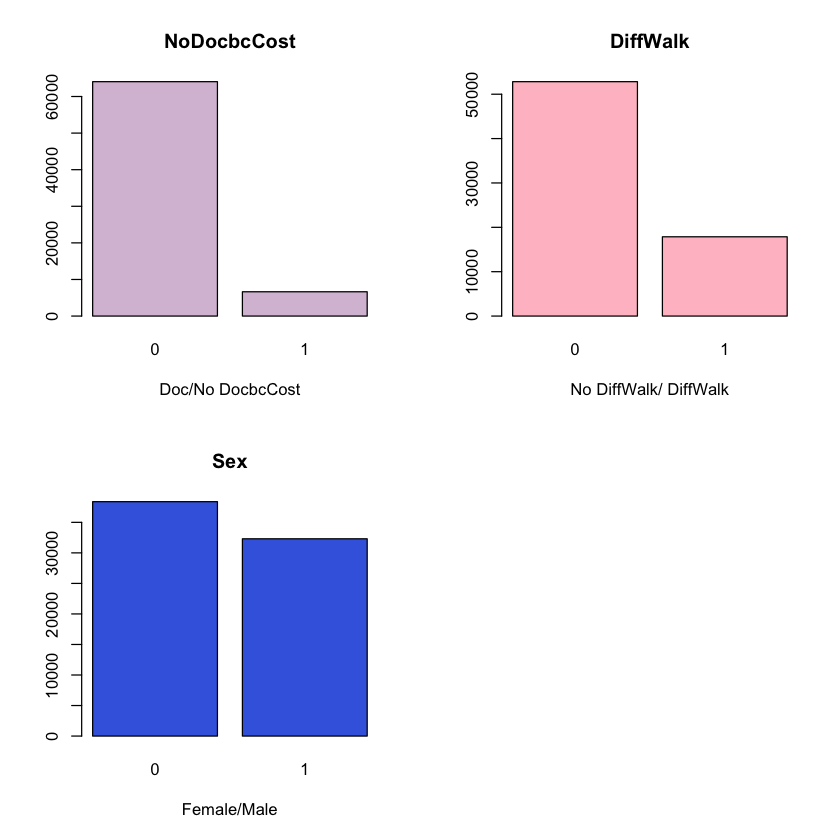

In [87]:
# Simple Bar Plot 
par(mfrow = c(3, 2))
counts1 <- table(data$Diabetes)
barplot(counts1, main="Diabetes", 
   xlab="No Diabetes/ Diabetes",col='pink')

counts2 <- table(data$HighBP)
barplot(counts2, main="HighBP", 
   xlab="LowBP/HighBP",col='royalblue')

counts3 <- table(data$HighChol)
barplot(counts3, main="HighChol", 
   xlab="Low Chol/High Chol",col='thistle')

counts4 <- table(data$Diabetes)
barplot(counts4, main="CholCheck", 
   xlab="No CholCheck/ yes CholCheck",col='pink')

counts5 <- table(data$Smoker)
barplot(counts5, main="Smoker", 
   xlab="Non Smoker /Smoker ",col='royalblue')

counts6 <- table(data$HighChol)
barplot(counts6, main="Stroke", 
   xlab="No Stroke/ Stroke",col='thistle')

counts7 <- table(data$HeartDiseaseorAttack)
barplot(counts7, main="HeartDiseaseorAttack", 
   xlab="No HeartDiseaseorAttack/ HeartDiseaseorAttack",col='pink')

counts8 <- table(data$PhysActivity)
barplot(counts8, main="PhysActivity", 
   xlab="No PhysActivity/PhysActivity",col='royalblue')

counts9 <- table(data$HighChol)
barplot(counts9, main="Fruits", 
   xlab="No Fruits/Fruits",col='thistle')

counts10 <- table(data$Veggies)
barplot(counts10, main="Veggies", 
   xlab="No Veggies/ Veggies",col='pink')

counts11 <- table(data$HvyAlcoholConsump)
barplot(counts11, main="HvyAlcoholConsump", 
   xlab="LowAlcoholConsump/HvyAlcoholConsump",col='royalblue')

counts12 <- table(data$AnyHealthcare)
barplot(counts12, main="AnyHealthcare", 
   xlab="No Healthcare/yesHealthcare",col='thistle')

counts13 <- table(data$NoDocbcCost)
barplot(counts13, main="NoDocbcCost", 
   xlab="Doc/No DocbcCost",col='thistle')

counts14 <- table(data$DiffWalk)
barplot(counts14, main="DiffWalk", 
   xlab="No DiffWalk/ DiffWalk",col='pink')

counts15 <- table(data$Sex)
barplot(counts15, main="Sex", 
   xlab="Female/Male",col='royalblue')

,Diabetes_binary,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
Diabetes_binary,1.00,0.29,0.41,0.09,0.21,0.28,-0.17,-0.22
BMI,0.29,1.00,0.27,0.10,0.16,-0.04,-0.10,-0.12
GenHlth,0.41,0.27,1.00,0.32,0.55,0.16,-0.29,-0.38
MentHlth,0.09,0.10,0.32,1.00,0.38,-0.10,-0.11,-0.22
PhysHlth,0.21,0.16,0.55,0.38,1.00,0.08,-0.16,-0.28
Age,0.28,-0.04,0.16,-0.10,0.08,1.00,-0.11,-0.13


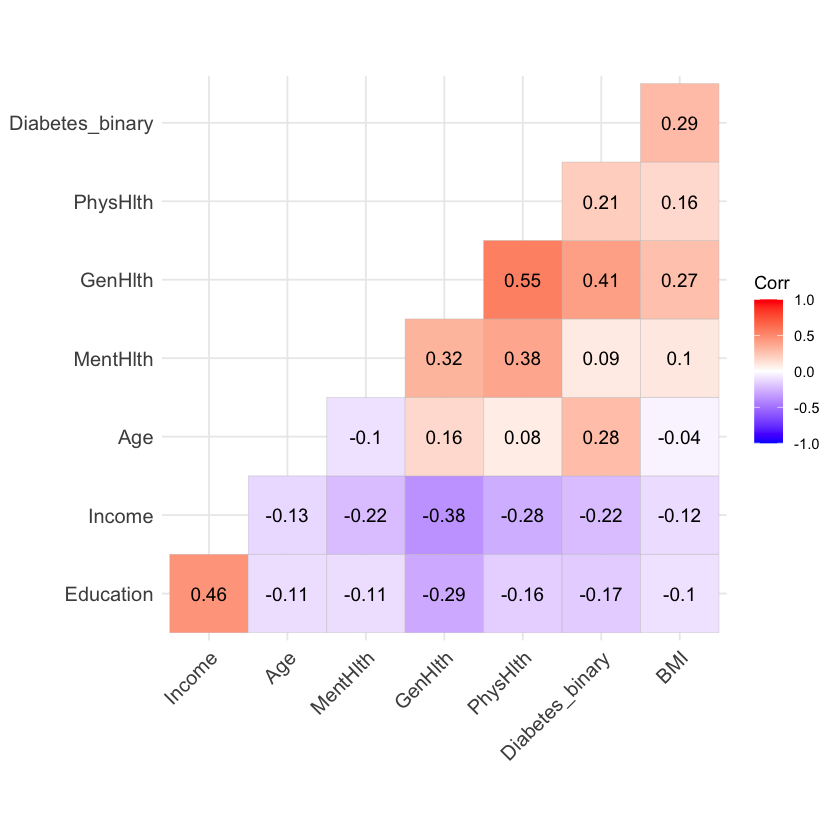

In [168]:
#correlation matrix ### checking variables for multicoliniarity  
library(ggcorrplot)
#Data needs to be all numeric
corr <- round(cor(df, method = 'pearson'), digits = 2)
head(corr[])
ggcorrplot(corr, hc.order = TRUE, type = "lower",
           lab = TRUE)

# Split data into train and test sets 70/30

In [325]:
#splitting data into train and test set 
set.seed(15474222)
dt = sort(sample(nrow(data), nrow(data)*.7))
train<-data[dt,]
test <- data[-dt,]
nrow(data)
nrow(train)
nrow(test) 

[1] 70692

[1] 49484

[1] 21208

# Remove Outliers

In [207]:
df1 <- data
#remove outliers from Original income data
outliers <- boxplot.stats(df1$BMI)$out#Remove outliers from original data 
outliers1 <- boxplot.stats(df1$MentHlth)$out  
outliers2 <- boxplot.stats(df1$PhysHlth)$out#Remove outliers from original data 
str(outliers)
str(outliers1)
str(outliers2)
out <- df1[-which(df1$BMI %in% outliers),]
out <- out[-which(out$MentHlth %in% outliers1),] 
out <- out[-which(out$PhysHlth %in% outliers2),] 

 num [1:2181] 58 47 47 47 52 69 56 52 47 47 ...
 num [1:11816] 7 30 20 7 15 20 10 15 30 30 ...
 num [1:10624] 30 30 30 25 30 30 30 30 21 30 ...


In [208]:
nrow(out)
nrow(data)

[1] 51793

[1] 70692

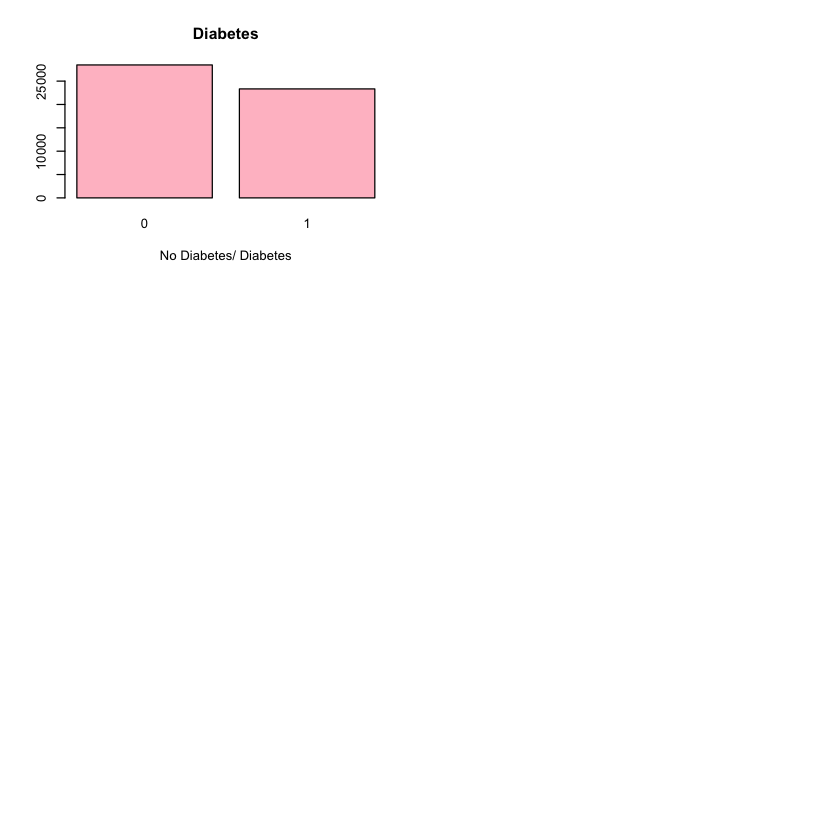

In [215]:
# Simple Bar Plot 
par(mfrow = c(3, 2))
counts1 <- table(out$Diabetes)
barplot(counts1, main="Diabetes", 
   xlab="No Diabetes/ Diabetes",col='pink')

In [219]:
library(kimisc)
df1 <- sample.rows(subset(out,  Diabetes == "0"), 23331)
df2 <- sample.rows(subset(out,  Diabetes == "1"), 23331)
df1 <-rbind(df1,df2)

`sample.rows()` is deprecated, use `dplyr::sample_n()` instead.



In [220]:
nrow(df1)

[1] 46662

In [218]:
summary(out)

 Diabetes  HighBP    HighChol  CholCheck      BMI        Smoker    Stroke   
 0:28462   0:24620   0:26310   0: 1337   Min.   :13.00   0:28790   0:49478  
 1:23331   1:27173   1:25483   1:50456   1st Qu.:25.00   1:23003   1: 2315  
                                         Median :28.00                      
                                         Mean   :28.77                      
                                         3rd Qu.:32.00                      
                                         Max.   :45.00                      
 HeartDiseaseorAttack PhysActivity Fruits    Veggies   HvyAlcoholConsump
 0:45639              0:12486      0:19104   0:10129   0:49531          
 1: 6154              1:39307      1:32689   1:41664   1: 2262          
                                                                        
                                                                        
                                                                        
                       

In [221]:
#splitting data with outliers removed into train and test set 
set.seed(15474222)
dt = sort(sample(nrow(df1), nrow(df1)*.7))
otrain<-df1[dt,]
otest <- df1[-dt,]
nrow(df1)
nrow(otrain)
nrow(otest) 

[1] 46662

[1] 32663

[1] 13999

# Logistic Regression 

## Model 1 - no outliers 

In [247]:
fit1 <- glm(Diabetes ~.,
            data=otrain, family='binomial')
summary(fit1)


Call:
glm(formula = Diabetes ~ ., family = "binomial", data = otrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8654  -0.8026  -0.1405   0.8309   3.0659  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -7.625744   0.189429 -40.257  < 2e-16 ***
HighBP1                0.697443   0.028921  24.116  < 2e-16 ***
HighChol1              0.532541   0.027755  19.187  < 2e-16 ***
CholCheck1             1.430295   0.120362  11.883  < 2e-16 ***
BMI                    0.096633   0.002754  35.083  < 2e-16 ***
Smoker1                0.012922   0.027833   0.464 0.642447    
Stroke1                0.238307   0.067601   3.525 0.000423 ***
HeartDiseaseorAttack1  0.174150   0.044518   3.912 9.16e-05 ***
PhysActivity1         -0.014058   0.032676  -0.430 0.667038    
Fruits1               -0.073045   0.029110  -2.509 0.012098 *  
Veggies1              -0.022151   0.035257  -0.628 0.529835    
HvyAlcoholConsump1    -0.818162 

In [241]:
# Predict on test
p <- predict(fit1, otest, type = "response")
# If p exceeds threshold of 0.5, 1 else 0
hd_or_nohd <- ifelse(p > 0.5, 1, 0)
# Convert to factor: p_class
p_class <- factor(hd_or_nohd, levels = levels(otest[["Diabetes"]]))
# Create confusion matrix
confusionMatrix(p_class, otest[["Diabetes"]], mode = "everything", positive="1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5076 1648
         1 1873 5402
                                          
               Accuracy : 0.7485          
                 95% CI : (0.7412, 0.7557)
    No Information Rate : 0.5036          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.4968          
                                          
 Mcnemar's Test P-Value : 0.00016         
                                          
            Sensitivity : 0.7662          
            Specificity : 0.7305          
         Pos Pred Value : 0.7425          
         Neg Pred Value : 0.7549          
              Precision : 0.7425          
                 Recall : 0.7662          
                     F1 : 0.7542          
             Prevalence : 0.5036          
         Detection Rate : 0.3859          
   Detection Prevalence : 0.5197          
      Balanced Accuracy 

In [242]:
#check if the model is statistically significant
with(fit1, null.deviance - deviance)
with(fit1, df.null - df.residual)
with(fit1, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 11985.92

[1] 21

[1] 0

In [232]:
car::vif(fit1)

HighBP             HighChol            CholCheck 
            1.132455             1.061163             1.013031 
                 BMI               Smoker               Stroke 
            1.098223             1.062518             1.046841 
HeartDiseaseorAttack         PhysActivity               Fruits 
            1.106763             1.088293             1.091475 
             Veggies    HvyAlcoholConsump        AnyHealthcare 
            1.093074             1.015181             1.091079 
         NoDocbcCost              GenHlth             MentHlth 
            1.086817             1.221467             1.063602 
            PhysHlth             DiffWalk                  Sex 
            1.140947             1.191917             1.115341 
                 Age            Education               Income 
            1.289145             1.304323             1.422443

In [243]:
#Adjusted R2 
#NagelkerkeR2(fit1)
#R2
ll.null <- fit1$null.deviance/-2
ll.proposed <- fit1$deviance/-2
(ll.null-ll.proposed) / ll.null

[1] 0.2647055

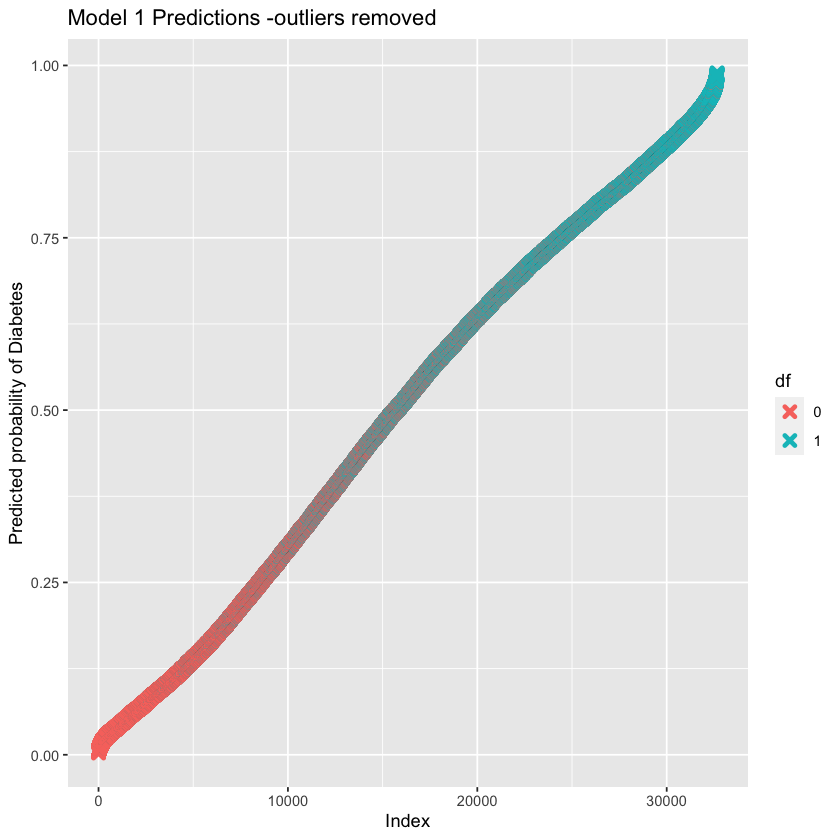

In [251]:
## now we can plot the data
predicted.data <- data.frame(
  probability.of.df=fit1$fitted.values,
  df=otrain$Diabetes)
 
predicted.data <- predicted.data[
  order(predicted.data$probability.of.df, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)
 
## Lastly, we can plot the predicted probabilities for each sample
ggplot(data=predicted.data, aes(x=rank, y=probability.of.df)) +
  geom_point(aes(color=df), alpha=1, shape=4, stroke=2) +
  xlab("Index") +
  ylab("Predicted probability of Diabetes")+
  ggtitle('Model 1 Predictions -outliers removed')

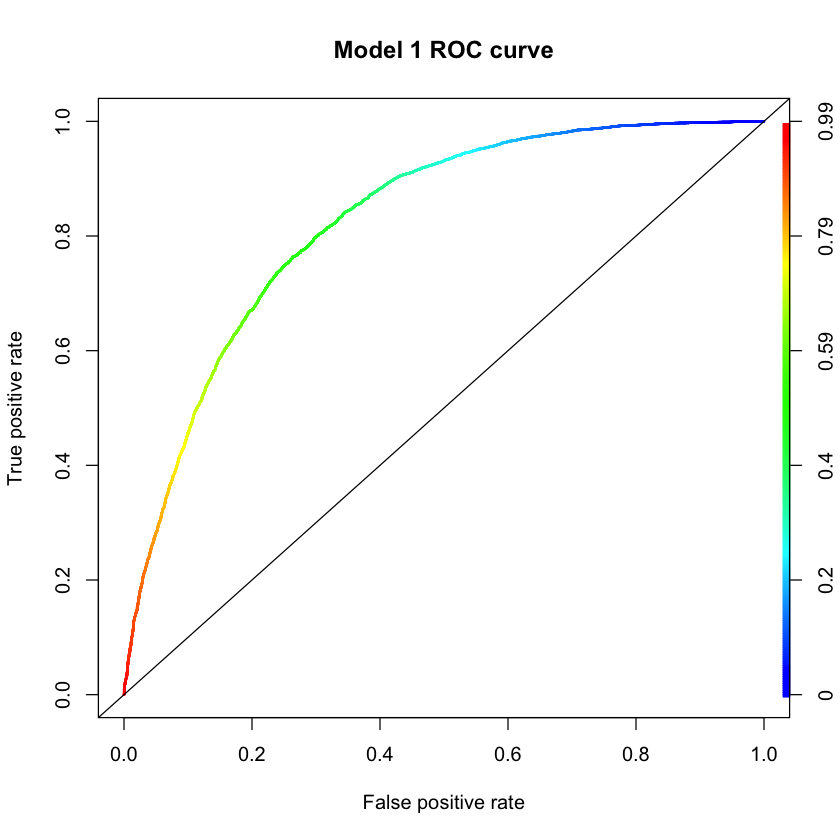

In [348]:
library("ROCR")
pred <- predict(fit1, otest, type = "response")
pred <- prediction(pred, otest$Diabetes)
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize = T, lwd = 2, main = "Model 1 ROC curve")
abline(a = 0, b = 1)

In [236]:
glm_mod <- caret::train(Diabetes ~ ., 
                       data= otrain,
                       method="glm",
                       family="binomial")

Waiting for profiling to be done...



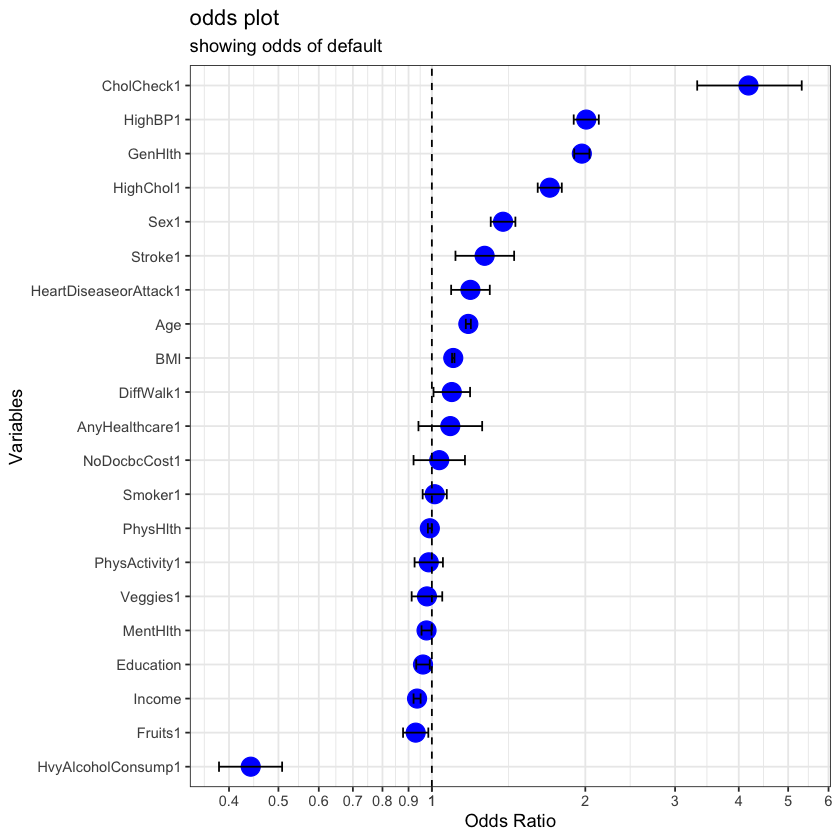

In [237]:
best_plot <- OddsPlotty::odds_plot(glm_mod$finalModel,
                             title='odds plot',
                             subtitle='showing odds of default')
best_plot$odds_plot

## Model 2 - non significant variables removed

In [275]:
fit2 <- glm(Diabetes ~.- Smoker -Stroke -PhysActivity
            -AnyHealthcare -NoDocbcCost -MentHlth
            -PhysHlth -DiffWalk -Education -Veggies,
            data=otrain, family='binomial')
summary(fit2)


Call:
glm(formula = Diabetes ~ . - Smoker - Stroke - PhysActivity - 
    AnyHealthcare - NoDocbcCost - MentHlth - PhysHlth - DiffWalk - 
    Education - Veggies, family = "binomial", data = otrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8355  -0.8025  -0.1408   0.8335   3.0582  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -7.783236   0.167543 -46.455  < 2e-16 ***
HighBP1                0.703767   0.028865  24.381  < 2e-16 ***
HighChol1              0.531082   0.027693  19.177  < 2e-16 ***
CholCheck1             1.438024   0.119904  11.993  < 2e-16 ***
BMI                    0.097113   0.002727  35.609  < 2e-16 ***
HeartDiseaseorAttack1  0.198905   0.043953   4.525 6.03e-06 ***
Fruits1               -0.083674   0.028229  -2.964  0.00304 ** 
HvyAlcoholConsump1    -0.819004   0.072331 -11.323  < 2e-16 ***
GenHlth                0.681824   0.016612  41.044  < 2e-16 ***
Sex1                   0.328906 

In [267]:
# Predict on test
p <- predict(fit2, otest, type = "response")
# If p exceeds threshold of 0.5, 1 else 0
hd_or_nohd <- ifelse(p > 0.5, 1, 0)
# Convert to factor: p_class
p_class <- factor(hd_or_nohd, levels = levels(otest[["Diabetes"]]))
# Create confusion matrix
confusionMatrix(p_class, otest[["Diabetes"]], mode = "everything", positive="1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5046 1637
         1 1903 5413
                                          
               Accuracy : 0.7471          
                 95% CI : (0.7398, 0.7543)
    No Information Rate : 0.5036          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4941          
                                          
 Mcnemar's Test P-Value : 8.431e-06       
                                          
            Sensitivity : 0.7678          
            Specificity : 0.7261          
         Pos Pred Value : 0.7399          
         Neg Pred Value : 0.7551          
              Precision : 0.7399          
                 Recall : 0.7678          
                     F1 : 0.7536          
             Prevalence : 0.5036          
         Detection Rate : 0.3867          
   Detection Prevalence : 0.5226          
      Balanced Accuracy 

In [436]:
car::vif(fit2)

HighBP             HighChol            CholCheck 
            1.132288             1.058908             1.004897 
                 BMI HeartDiseaseorAttack               Fruits 
            1.082517             1.078919             1.030376 
   HvyAlcoholConsump              GenHlth                  Sex 
            1.006028             1.097499             1.072850 
                 Age               Income 
            1.188092             1.135970

In [287]:
#Adjusted R2 
#NagelkerkeR2(fit2)
#R2
ll.null <- fit2$null.deviance/-2
ll.proposed <- fit2$deviance/-2
(ll.null-ll.proposed) / ll.null

[1] 0.2639011

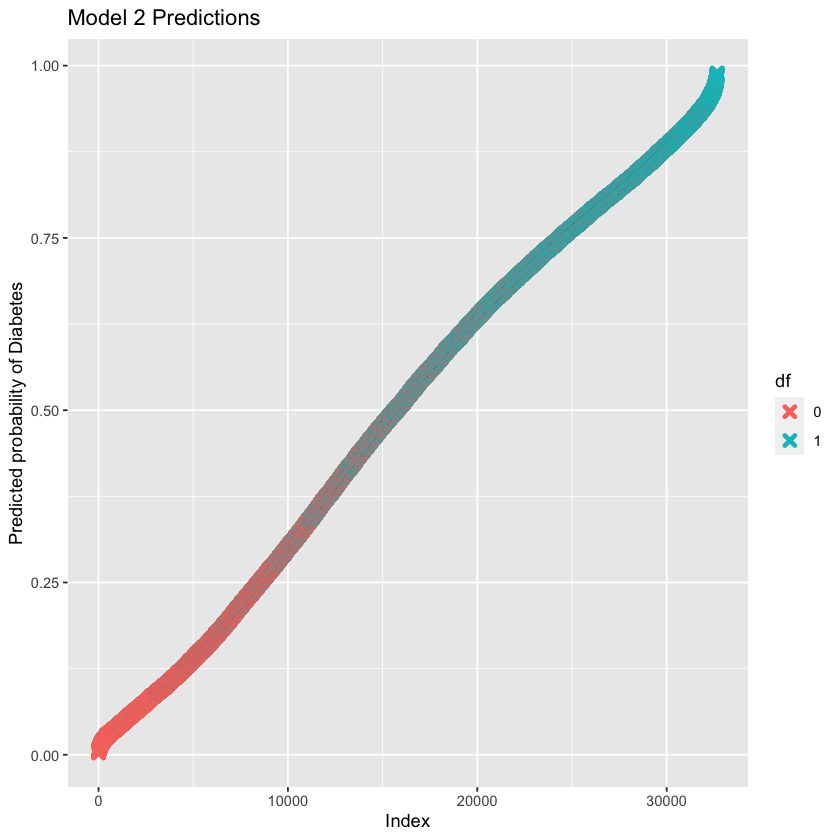

In [289]:
## now we can plot the data
predicted.data <- data.frame(
  probability.of.df=fit2$fitted.values,
  df=otrain$Diabetes)
 
predicted.data <- predicted.data[
  order(predicted.data$probability.of.df, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)
 
## Lastly, we can plot the predicted probabilities for each sample
ggplot(data=predicted.data, aes(x=rank, y=probability.of.df)) +
  geom_point(aes(color=df), alpha=1, shape=4, stroke=2) +
  xlab("Index") +
  ylab("Predicted probability of Diabetes")+
  ggtitle('Model 2 Predictions')

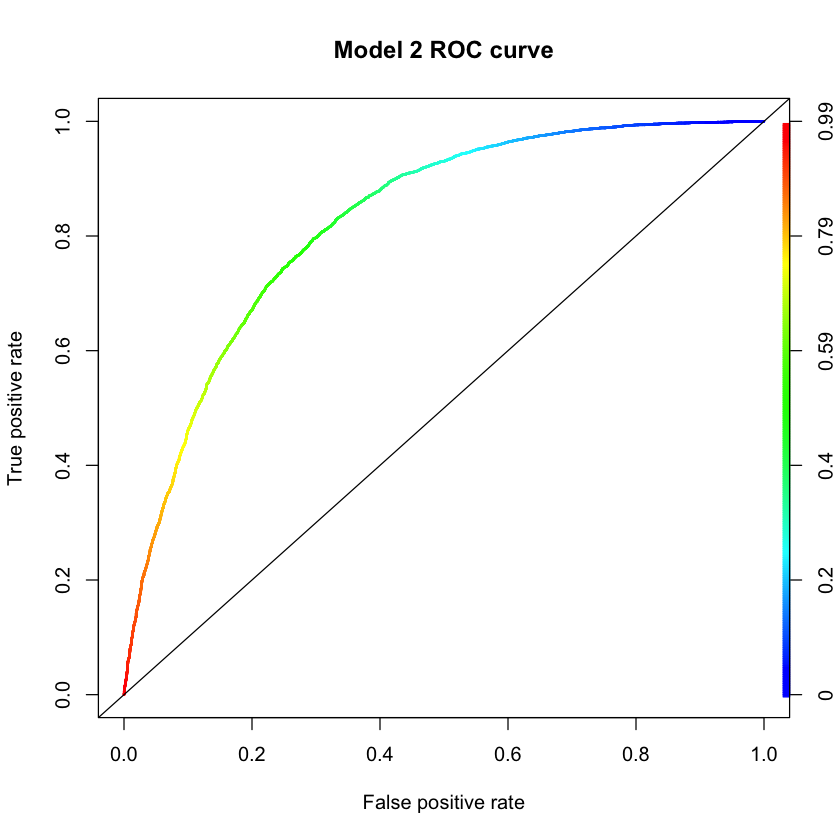

In [349]:
library("ROCR")
pred <- predict(fit2, otest, type = "response")
pred <- prediction(pred, otest$Diabetes)
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize = T, lwd = 2, main = "Model 2 ROC curve")
abline(a = 0, b = 1)

## bootstepAIC library - to find lowes AIC

In [271]:
library(bootStepAIC)

Warning message:
“package ‘bootStepAIC’ was built under R version 4.0.5”
Loading required package: MASS

Warning message:
“package ‘MASS’ was built under R version 4.0.5”

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


The following object is masked from ‘package:olsrr’:

    cement




In [290]:
fit_boot <- boot.stepAIC(fit1, otrain, B=50, direction = "backward")

In [291]:
fit_boot


Summary of Bootstrapping the 'stepAIC()' procedure for

Call:
glm(formula = Diabetes ~ ., family = "binomial", data = otrain)

Bootstrap samples: 50 
Direction: backward 
Penalty: 2 * df

Covariates selected
                     (%)
Age                  100
BMI                  100
CholCheck            100
GenHlth              100
HighBP               100
HighChol             100
HvyAlcoholConsump    100
Income               100
Sex                  100
Stroke               100
HeartDiseaseorAttack  98
Education             96
Fruits                88
MentHlth              78
PhysHlth              78
DiffWalk              72
AnyHealthcare         40
Veggies               24
NoDocbcCost           20
Smoker                18
PhysActivity          16

Coefficients Sign
                       + (%)  - (%)
Age                   100.00   0.00
BMI                   100.00   0.00
CholCheck1            100.00   0.00
DiffWalk1             100.00   0.00
GenHlth               100.00   0.00
HeartD

## Model 3 -Final Model

In [296]:
fit3 <- glm(Diabetes ~ HighBP + HighChol + CholCheck + BMI + Stroke + HeartDiseaseorAttack + 
    Fruits + HvyAlcoholConsump + GenHlth + Sex + Age + Education + Income , 
            family='binomial', data = otrain)
summary(fit3)


Call:
glm(formula = Diabetes ~ HighBP + HighChol + CholCheck + BMI + 
    Stroke + HeartDiseaseorAttack + Fruits + HvyAlcoholConsump + 
    GenHlth + Sex + Age + Education + Income, family = "binomial", 
    data = otrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8291  -0.8031  -0.1404   0.8327   3.0604  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -7.612675   0.178805 -42.575  < 2e-16 ***
HighBP1                0.699125   0.028899  24.192  < 2e-16 ***
HighChol1              0.530720   0.027706  19.155  < 2e-16 ***
CholCheck1             1.440188   0.119898  12.012  < 2e-16 ***
BMI                    0.097289   0.002730  35.639  < 2e-16 ***
Stroke1                0.246114   0.067387   3.652  0.00026 ***
HeartDiseaseorAttack1  0.177949   0.044322   4.015 5.95e-05 ***
Fruits1               -0.079162   0.028293  -2.798  0.00514 ** 
HvyAlcoholConsump1    -0.817473   0.072367 -11.296  < 2e-16 ***
GenHlth

In [297]:
# Predict on test
p <- predict(fit3, otest, type = "response")
# If p exceeds threshold of 0.5, 1 else 0
hd_or_nohd <- ifelse(p > 0.5, 1, 0)
# Convert to factor: p_class
p_class <- factor(hd_or_nohd, levels = levels(otest[["Diabetes"]]))
# Create confusion matrix
confusionMatrix(p_class, otest[["Diabetes"]], mode = "everything", positive="1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5069 1635
         1 1880 5415
                                          
               Accuracy : 0.7489          
                 95% CI : (0.7416, 0.7561)
    No Information Rate : 0.5036          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4977          
                                          
 Mcnemar's Test P-Value : 3.863e-05       
                                          
            Sensitivity : 0.7681          
            Specificity : 0.7295          
         Pos Pred Value : 0.7423          
         Neg Pred Value : 0.7561          
              Precision : 0.7423          
                 Recall : 0.7681          
                     F1 : 0.7550          
             Prevalence : 0.5036          
         Detection Rate : 0.3868          
   Detection Prevalence : 0.5211          
      Balanced Accuracy 

In [282]:
car::vif(fit3)

CholCheck              GenHlth                  Age 
            1.005347             1.097100             1.180629 
              HighBP             HighChol               Income 
            1.129470             1.057096             1.124701 
                 Sex    HvyAlcoholConsump                  BMI 
            1.059434             1.005404             1.075704 
HeartDiseaseorAttack 
            1.081259

In [298]:
#Adjusted R2 
#NagelkerkeR2(fit1)
#R2
ll.null <- fit3$null.deviance/-2
ll.proposed <- fit3$deviance/-2
(ll.null-ll.proposed) / ll.null

[1] 0.2643713

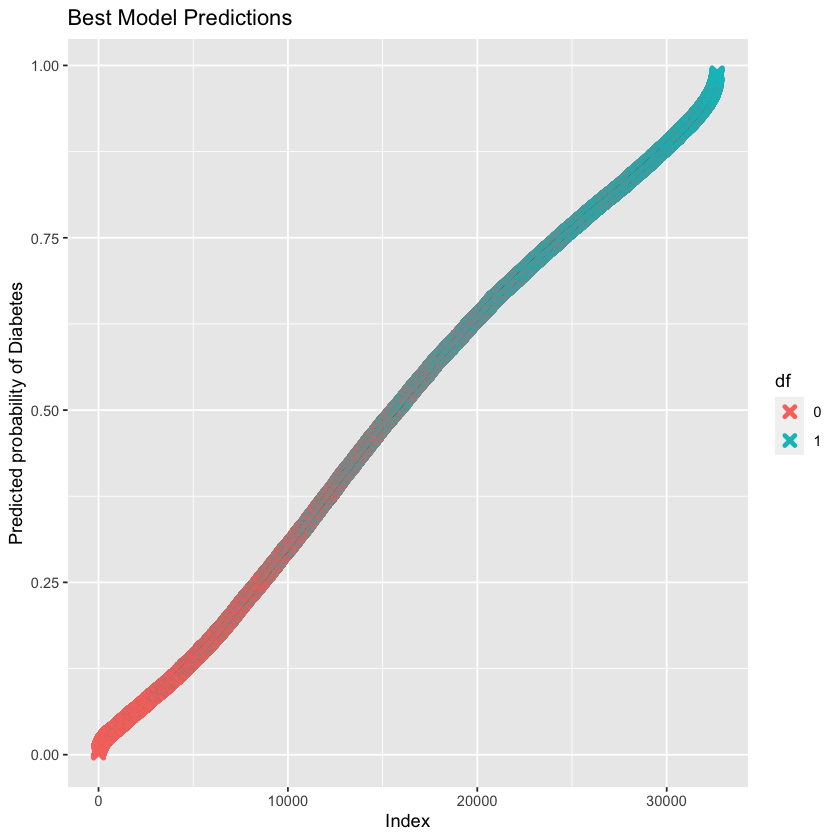

In [350]:
## now we can plot the data
predicted.data <- data.frame(
  probability.of.df=fit3$fitted.values,
  df=otrain$Diabetes)
 
predicted.data <- predicted.data[
  order(predicted.data$probability.of.df, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)
 
## Lastly, we can plot the predicted probabilities for each sample
ggplot(data=predicted.data, aes(x=rank, y=probability.of.df)) +
  geom_point(aes(color=df), alpha=1, shape=4, stroke=2) +
  xlab("Index") +
  ylab("Predicted probability of Diabetes")+
  ggtitle('Best Model Predictions')

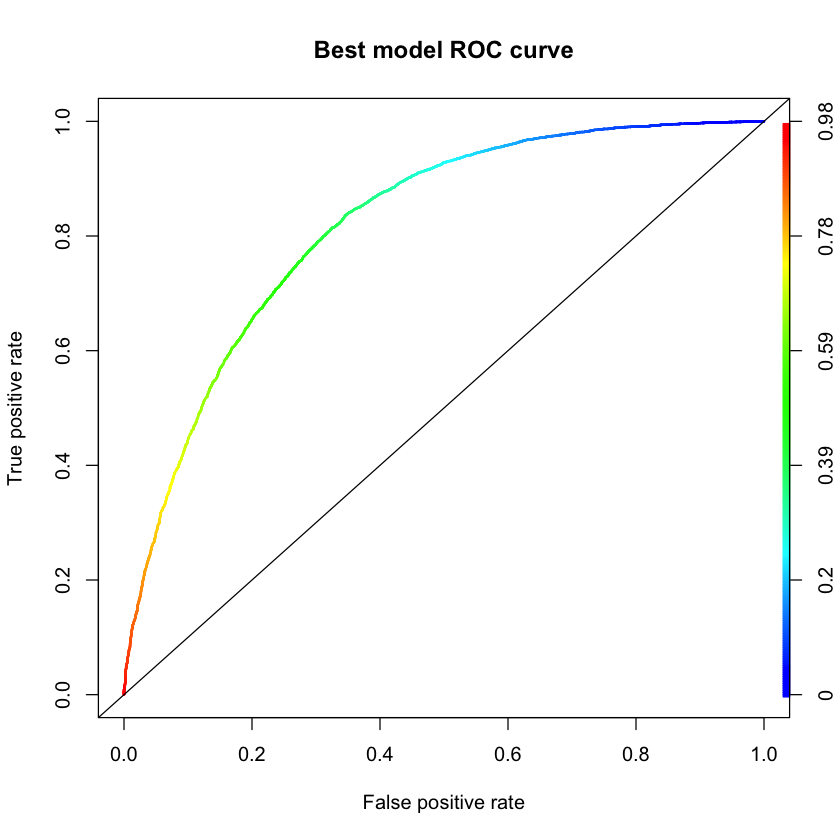

In [345]:
library("ROCR")
pred <- predict(fit3, otest, type = "response")
pred <- prediction(pred, otest$Diabetes)
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize = T, lwd = 2, main = "Best Model ROC curve")
abline(a = 0, b = 1)

### Odds Plot

In [299]:
glm_mod <- caret::train(Diabetes ~  HighBP + HighChol + CholCheck + BMI + Stroke + HeartDiseaseorAttack + 
    Fruits + HvyAlcoholConsump + GenHlth + Sex + Age + Education + Income, 
                       data= otrain,
                       method="glm",
                       family="binomial")

Waiting for profiling to be done...



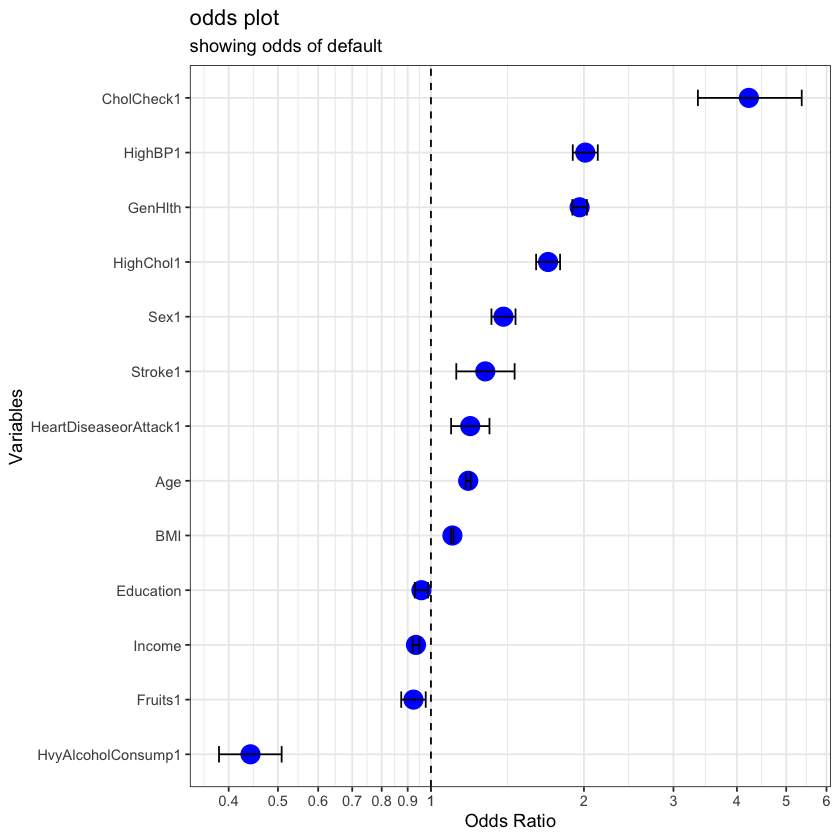

In [300]:
best_plot <- OddsPlotty::odds_plot(glm_mod$finalModel,
                             title='odds plot',
                             subtitle='showing odds of default')
best_plot$odds_plot

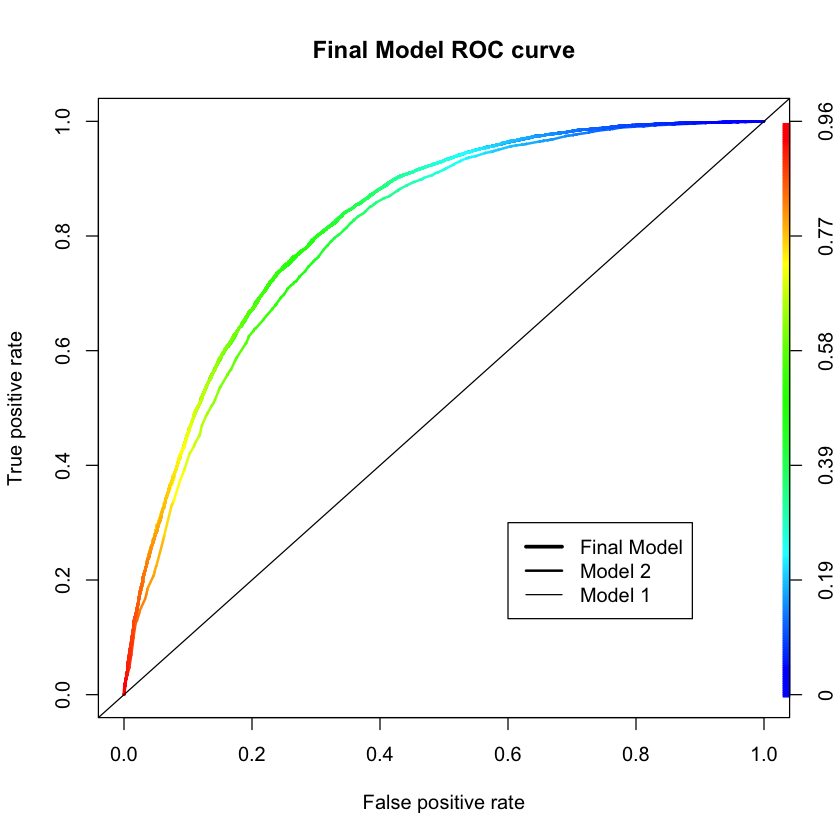

In [238]:
library("ROCR")
pred <- predict(fit6, otest, type = "response")
pred <- prediction(pred, otest$Diabetes)
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize = T, lwd = 2, main = "Final Model ROC curve", label = "Final Model")
pred <- predict(fit5, otest, type = "response")
pred <- prediction(pred, otest$Diabetes)
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize = T, lwd = 2, label = "Model 2 ROC curve", add=T)
pred <- predict(fit4, otest, type = "response")
pred <- prediction(pred, otest$Diabetes)
roc <- performance(pred, "tpr", "fpr")
plot(roc, colorize = T, lwd = 2, label = "Model 1 ROC curve", add=T)
legend(0.6, 0.3,lwd = c(3,2,1), legend = c("Final Model", "Model 2", "Model 1"))
abline(a = 0, b = 1)

# Random Forest 

## RF1

In [8]:
library('randomForest')

In [326]:
rf1 = randomForest(Diabetes~., data=train)
print(rf1)


Call:
 randomForest(formula = Diabetes ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 25.58%
Confusion matrix:
             Diabetic Non Diabetic class.error
Diabetic        19510         5177   0.2097055
Non Diabetic     7479        17318   0.3016091


In [327]:
#Test Confusion Matrix
p <- predict(rf1, test)
confusionMatrix(p, test$Diabetes ,mode = "everything)

Confusion Matrix and Statistics

              Reference
Prediction     Diabetic Non Diabetic
  Diabetic         8509         3181
  Non Diabetic     2150         7368
                                          
               Accuracy : 0.7486          
                 95% CI : (0.7427, 0.7545)
    No Information Rate : 0.5026          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.497           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7983          
            Specificity : 0.6985          
         Pos Pred Value : 0.7279          
         Neg Pred Value : 0.7741          
              Precision : 0.7279          
                 Recall : 0.7983          
                     F1 : 0.7615          
             Prevalence : 0.5026          
         Detection Rate : 0.4012          
   Detection Pr

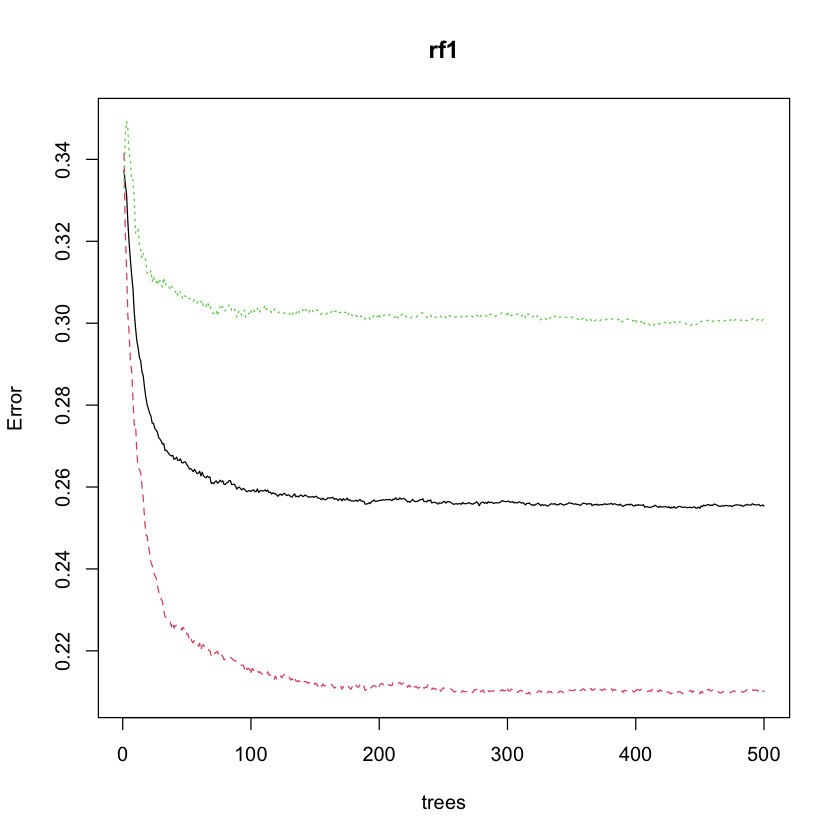

In [256]:
plot(rf1)

mtry = 4  OOB error = 25.48% 
Searching left ...
mtry = 8 	OOB error = 26.45% 
-0.03798874 0.05 
Searching right ...
mtry = 2 	OOB error = 25.17% 
0.01237212 0.05 


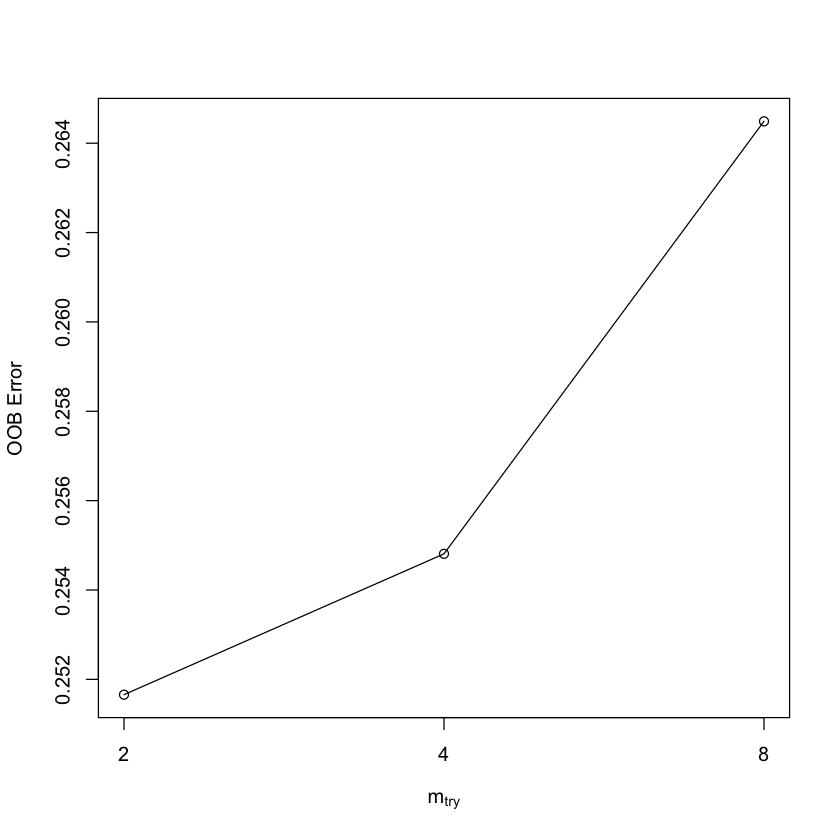

In [257]:
tune <- tuneRF(train[,-1], train[,1],
             stepFactor = 0.5,
             plot = TRUE,
             ntreeTry = 300,
             trace = TRUE,
             improve = 0.05)

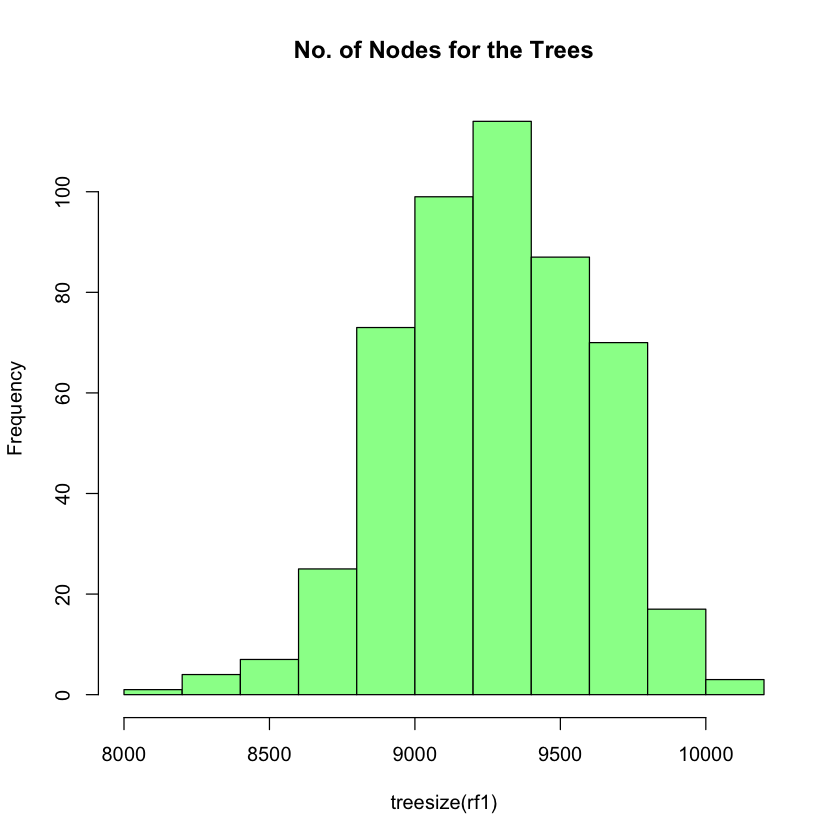

In [137]:
hist(treesize(rf1),
     main = "No. of Nodes for the Trees",
     col = "palegreen")

,MeanDecreaseGini
HighBP,1878.6641
HighChol,932.5675
CholCheck,142.4724
BMI,3115.2441
Smoker,478.2534
Stroke,203.9813
HeartDiseaseorAttack,421.4926
PhysActivity,430.5793
Fruits,480.2743
Veggies,398.8951


[1]  40474  71142  36298 633790 216928  80356  83279 177947 221780 182543
[11]  63370  70576 109235 213855 358551 410220  83334 197534 528163 380477
[21] 472871

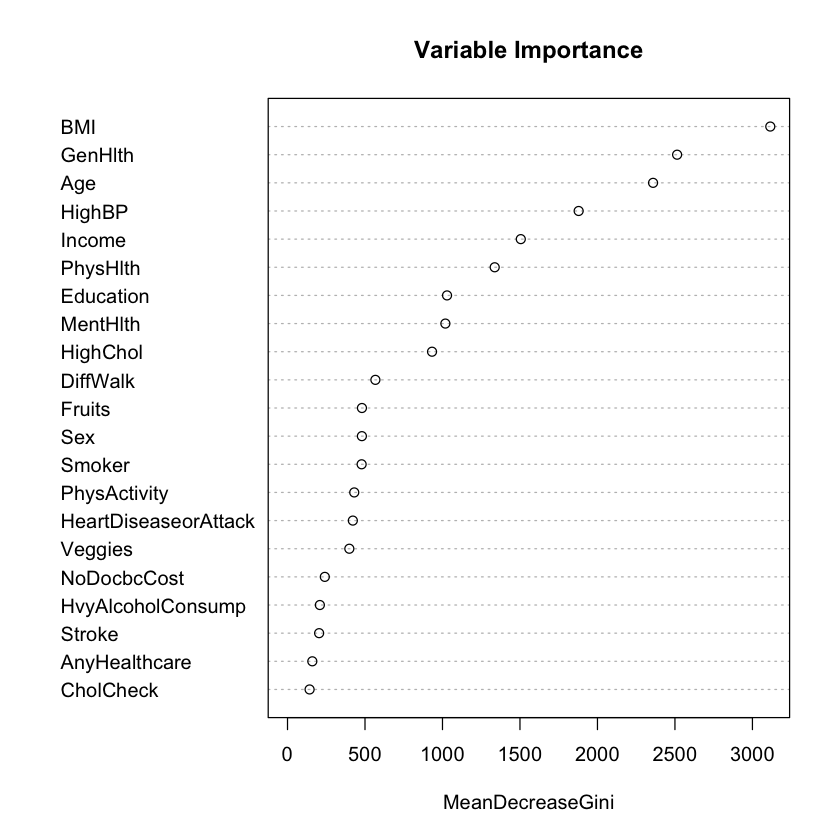

In [140]:
varImpPlot(rf1,
           sort = T,
           n.var=21,
           main = "Variable Importance")
importance(rf1)
varUsed(rf1)

## RF2 

In [328]:
rf2 = randomForest(Diabetes~., data=train,
                  ntree=300,
                  mtry=2,
                  importance = TRUE)
print(rf2)


Call:
 randomForest(formula = Diabetes ~ ., data = train, ntree = 300,      mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 2

        OOB estimate of  error rate: 25.13%
Confusion matrix:
             Diabetic Non Diabetic class.error
Diabetic        19589         5098   0.2065054
Non Diabetic     7336        17461   0.2958422


In [330]:
# Test Confusion Matrix
p <- predict(rf2, test)
confusionMatrix(p, test$Diabetes ,mode = "everything")

Confusion Matrix and Statistics

              Reference
Prediction     Diabetic Non Diabetic
  Diabetic         8466         3092
  Non Diabetic     2193         7457
                                          
               Accuracy : 0.7508          
                 95% CI : (0.7449, 0.7566)
    No Information Rate : 0.5026          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5014          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7943          
            Specificity : 0.7069          
         Pos Pred Value : 0.7325          
         Neg Pred Value : 0.7727          
              Precision : 0.7325          
                 Recall : 0.7943          
                     F1 : 0.7621          
             Prevalence : 0.5026          
         Detection Rate : 0.3992          
   Detection Pr

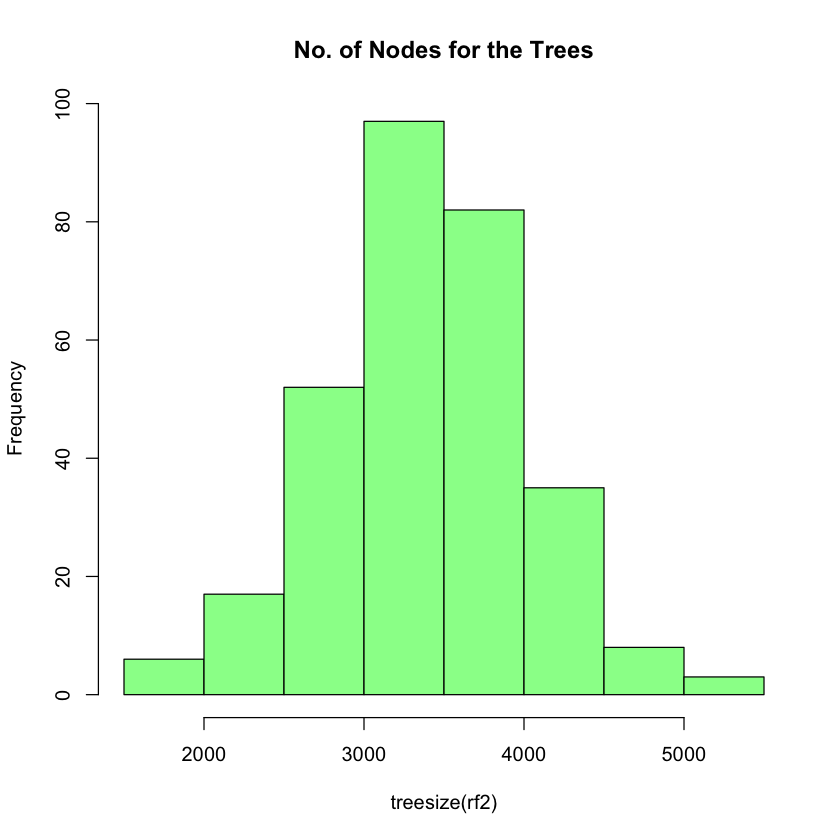

In [149]:
hist(treesize(rf2),
     main = "No. of Nodes for the Trees",
     col = "palegreen")

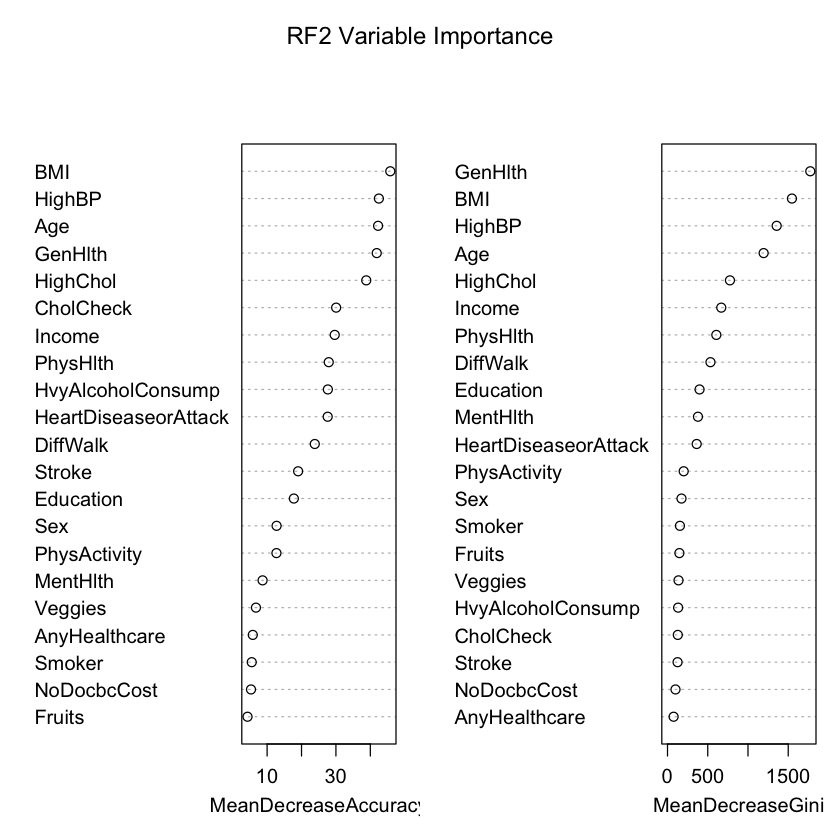

In [337]:
varImpPlot(rf2,
           sort = T,
           n.var=21,
           main = "RF2 Variable Importance")

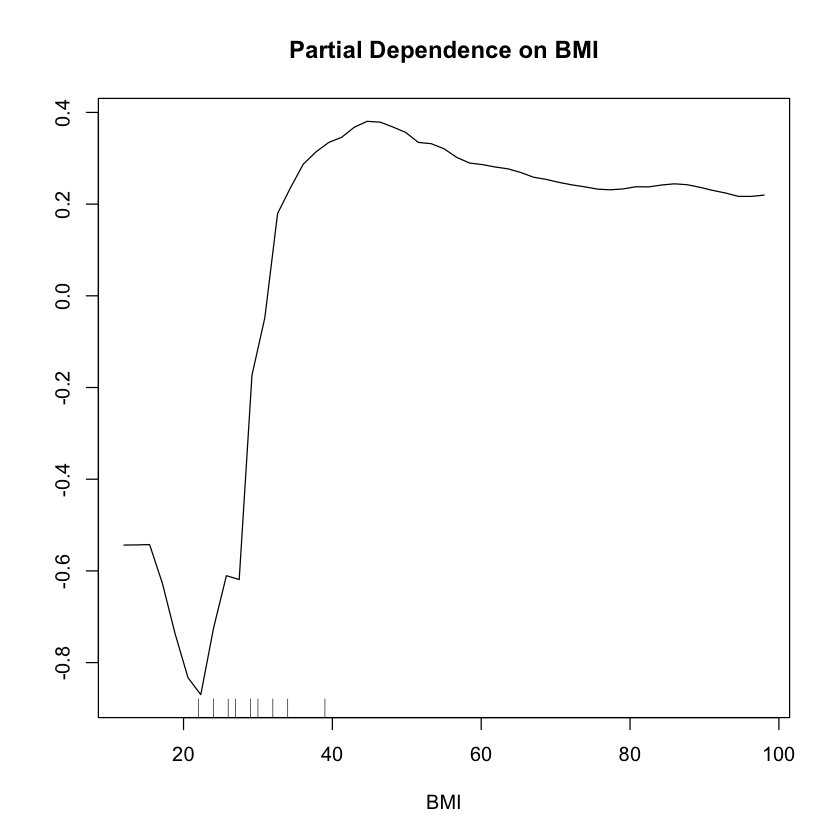

In [347]:
# Partial Dependence Plot
partialPlot(rf1, train, BMI)

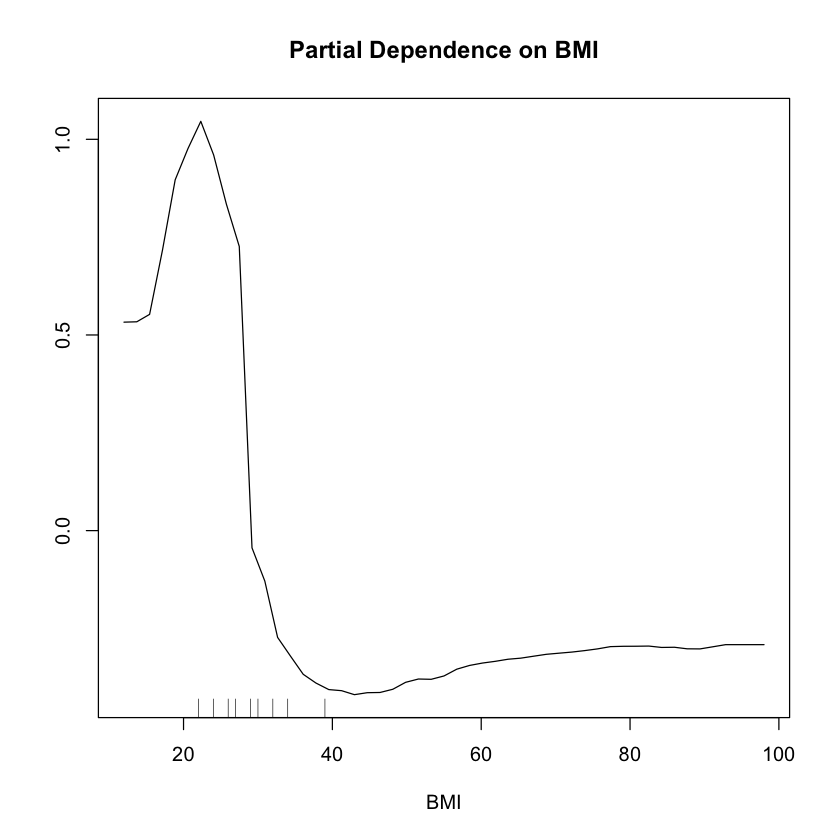

In [157]:
partialPlot(rf2, train, BMI)

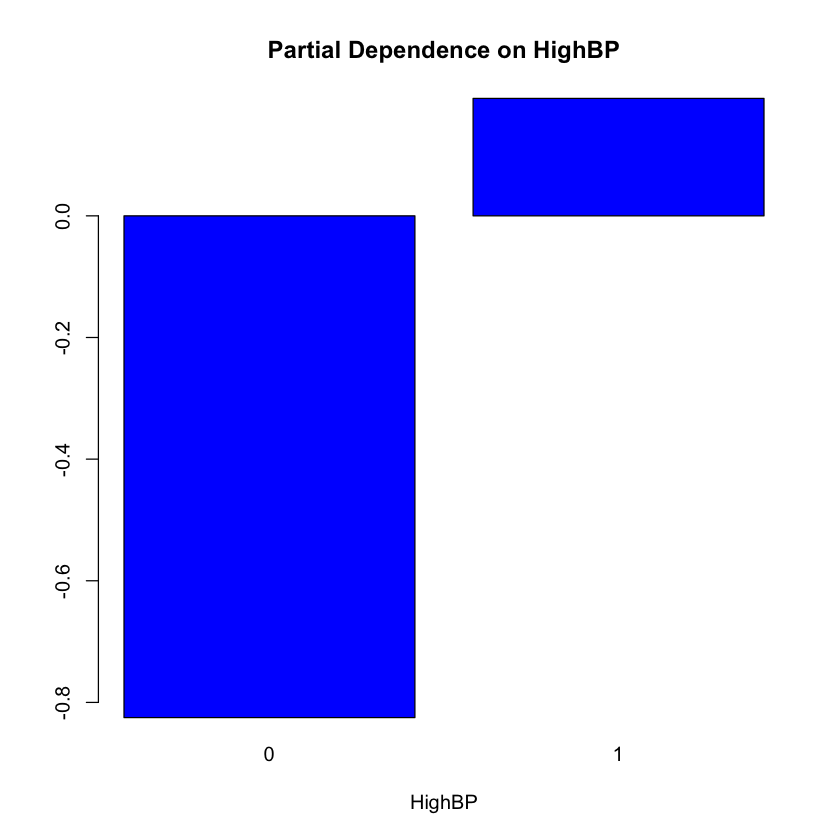

In [156]:
# Partial Dependence Plot
partialPlot(rf1, train, HighBP)

## RF3 - Final Model

In [345]:
rf3 = randomForest(Diabetes~+BMI +GenHlth +Age +HighBP +HighChol +HvyAlcoholConsump +PhysHlth +DiffWalk,
                  data=train,
                  ntree=300,
                  mtry=2,
                  importance=TRUE)
print(rf3)


Call:
 randomForest(formula = Diabetes ~ +BMI + GenHlth + Age + HighBP +      HighChol + HvyAlcoholConsump + PhysHlth + DiffWalk, data = train,      ntree = 300, mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 2

        OOB estimate of  error rate: 25.57%
Confusion matrix:
             Diabetic Non Diabetic class.error
Diabetic        19461         5226   0.2116904
Non Diabetic     7427        17370   0.2995120


In [346]:
#Test Confusion Matrix
p <- predict(rf3, test)
confusionMatrix(p, test$Diabetes,mode = "everything")

Confusion Matrix and Statistics

              Reference
Prediction     Diabetic Non Diabetic
  Diabetic         8413         3165
  Non Diabetic     2246         7384
                                          
               Accuracy : 0.7449          
                 95% CI : (0.7389, 0.7507)
    No Information Rate : 0.5026          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4895          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7893          
            Specificity : 0.7000          
         Pos Pred Value : 0.7266          
         Neg Pred Value : 0.7668          
              Precision : 0.7266          
                 Recall : 0.7893          
                     F1 : 0.7567          
             Prevalence : 0.5026          
         Detection Rate : 0.3967          
   Detection Pr